In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('/home/leechh/code/kaggle-R/Tools/')
from tools import *
from plot import *

这组 EDA 的目的是清洗 hits

# 0. Input and describe

In [2]:
train = pd.read_feather('/home/leechh/tempfile/R/train_v2_cut.feather')

In [3]:
train.shape

(170790, 148)

In [4]:
train.columns[32:120]

Index(['hits_action_type', 'hits_affiliation', 'hits_contentGroup1',
       'hits_contentGroup2', 'hits_contentGroup3', 'hits_contentGroup4',
       'hits_contentGroup5', 'hits_contentGroupUniqueViews1',
       'hits_contentGroupUniqueViews2', 'hits_contentGroupUniqueViews3',
       'hits_currencyCode', 'hits_dataSource', 'hits_domContentLoadedTime',
       'hits_domInteractiveTime', 'hits_domLatencyMetricsSample',
       'hits_domainLookupTime', 'hits_eventAction', 'hits_eventCategory',
       'hits_eventLabel', 'hits_exitScreenName',
       'hits_hasSocialSourceReferral', 'hits_hitNumber', 'hits_hostname',
       'hits_hour', 'hits_isClick', 'hits_isEntrance', 'hits_isExit',
       'hits_isFatal', 'hits_isImpression', 'hits_isInteraction',
       'hits_landingScreenName', 'hits_localProductPrice',
       'hits_localProductRevenue', 'hits_localTransactionRevenue',
       'hits_localTransactionShipping', 'hits_localTransactionTax',
       'hits_minute', 'hits_option', 'hits_pageDownloa

### hits 全家福 :) ,以上就是全部的hits 特征了.

In [5]:
# 将str转换为本来应该的格式
for i in train.columns:
    train[i] = train[i].apply(strtolist)

In [6]:
# find feak hits
feaklist = feakhits(train.iloc[:,32:120])
print(feaklist)

['hits_contentGroup4', 'hits_contentGroup5', 'hits_contentGroupUniqueViews2', 'hits_currencyCode', 'hits_isEntrance', 'hits_isExit', 'hits_isFatal', 'hits_isImpression', 'hits_isInteraction', 'hits_promoIsView', 'hits_screenDepth', 'hits_socialInteractionNetworkAction']


In [7]:
# 创建两个新的特征， realtarget, logtarget
train['realtarget'] = train.totals_transactionRevenue/(10**6)
train['logtarget'] = np.log1p(train.totals_transactionRevenue)

# 1. hits_landingScreenName ... hits_pageLoadSample

* **hits_landingScreenName** 会话的启动屏幕。
* **hits_localProductPrice** 产品价格,表示方方式是:传递到 GoogleAnalytics(分析)的值乘以 10^6(例例如,2.40将显示为 2400000)
* **hits_localProductRevenue** 以当地货币显示的产品收入入,表示方方式是:传递到 Google Analytics(分析)的值乘以 10^6(例例如,2.40 将显示为 2400000)
* **hits_localTransactionRevenue**以当地货币显示的交易易收入入总额,表示方方式是:传递到 Google Analytics(分析)的值乘以10^6(例例如,2.40 将显示为 2400000)
* **hits_localTransactionShipping**以当地货币表示的交易易运费总额,表示方方式是:传递到 Google Analytics(分析)的值乘以10^6(例例如,2.40 将显示为 2400000)
* **hits_localTransactionTax**以当地货币显示的交易易税总额,表示方方式是:传递到 Google Analytics(分析)的值乘以10^6(例例如,2.40 将显示为 2400000)
* **hits_minute**匹配发生生时间中的分钟部分(介于 0 到 59 之间)
* **hits_option**当已指定结帐选项时,此字段将自自动填充。例如,可以是 option = 'Fedex' 之类的送货方式选项。
* **hits_pageDownloadTime**在所有样本中下载此网网⻚页所需的总时间(以毫秒为单位)
* **hits_pageLoadSample**用于计算平均网网⻚页加载时间的网网⻚页浏览样本集(或计数)

In [8]:
hitslist1 = ['hits_landingScreenName', 'hits_localProductPrice',
             'hits_localProductRevenue', 'hits_localTransactionRevenue',
             'hits_localTransactionShipping', 'hits_localTransactionTax',
             'hits_minute', 'hits_option', 
             'hits_pageDownloadTime','hits_pageLoadSample']

In [34]:
train[hitslist1].head(5)

,hits_landingScreenName,hits_localProductPrice,hits_localProductRevenue,hits_localTransactionRevenue,hits_localTransactionShipping,hits_localTransactionTax,hits_minute,hits_option,hits_pageDownloadTime,hits_pageLoadSample
0,[shop.googlemerchandisestore.com/google+redesi...,"[12990000, 23990000, 24990000, 12990000, 19900...",nan,nan,nan,nan,"[14, 15]",nan,nan,nan
1,[shop.googlemerchandisestore.com/google+redesi...,"[3990000, 1500000, 4990000, 1990000, 1990000, ...",nan,nan,nan,nan,"[7, 9]",nan,nan,nan
2,[shop.googlemerchandisestore.com/google+redesi...,"[1990000, 4990000, 29990000, 20990000, 1699000...",nan,nan,nan,nan,"[21, 22]",nan,nan,nan
3,[shop.googlemerchandisestore.com/google+redesi...,"[55990000, 109990000, 69990000, 74990000, 7499...",nan,nan,nan,nan,"[50, 51]",nan,nan,nan
4,"[www.googlemerchandisestore.com/home, www.goog...","[4990000, 99990000, 99990000, 59990000, 199900...",nan,nan,nan,nan,"[41, 41, 41]",nan,nan,nan


In [33]:
for i in hitslist1:
    train[i].fillna('nan', inplace=True)

### **hits_landingScreenName** 会话的启动屏幕。

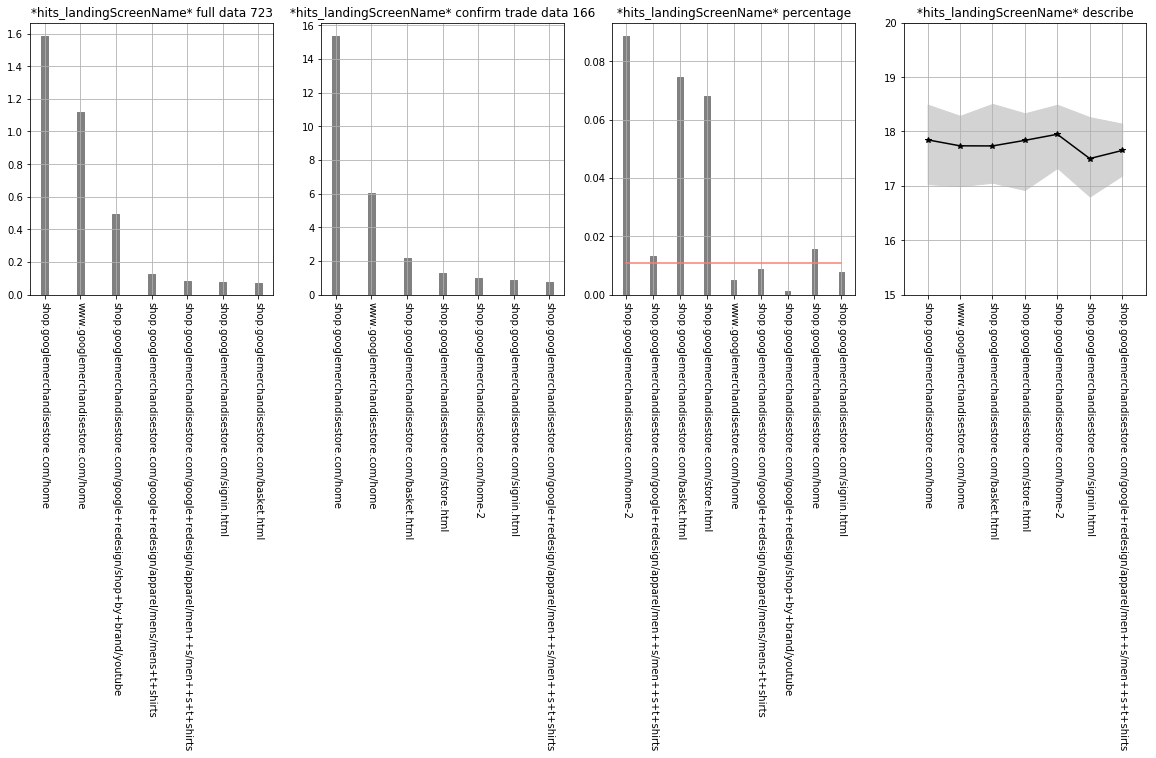

In [35]:
plot_hits(train, hitslist1[0],rotation=-90)

In [36]:
describeinfo(train, hitslist1[0])

hits_landingScreenName class: 723 totallen: 170790 len0: 133 len1: 86571 biglen: 84086


### **hits_localProductPrice** 产品价格,表示方方式是:传递到 GoogleAnalytics(分析)的值乘以 10^6(例例如,2.40将显示为 2400000)

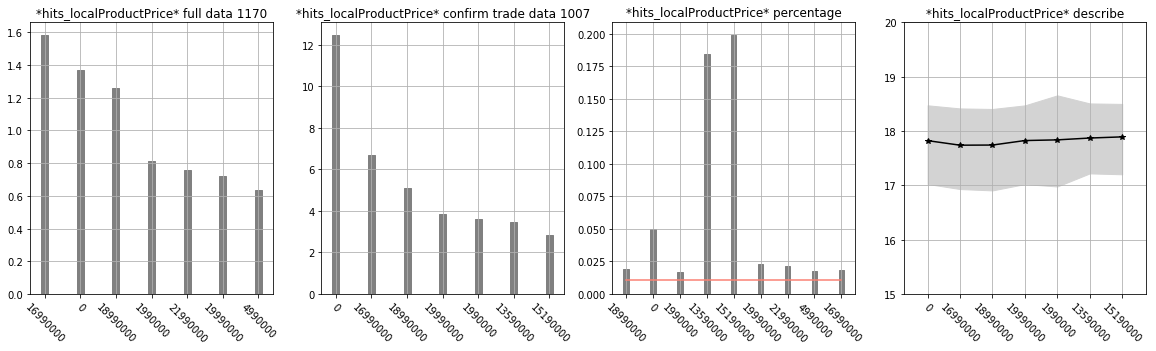

In [37]:
plot_hits(train, hitslist1[1], rotation=-45)

In [38]:
describeinfo(train, hitslist1[1])

hits_localProductPrice class: 1170 totallen: 170790 len0: 85376 len1: 1105 biglen: 84309


### **hits_localProductRevenue** 以当地货币显示的产品收入入,表示方方式是:传递到 Google Analytics(分析)的值乘以 10^6(例例如,2.40 将显示为 2400000)

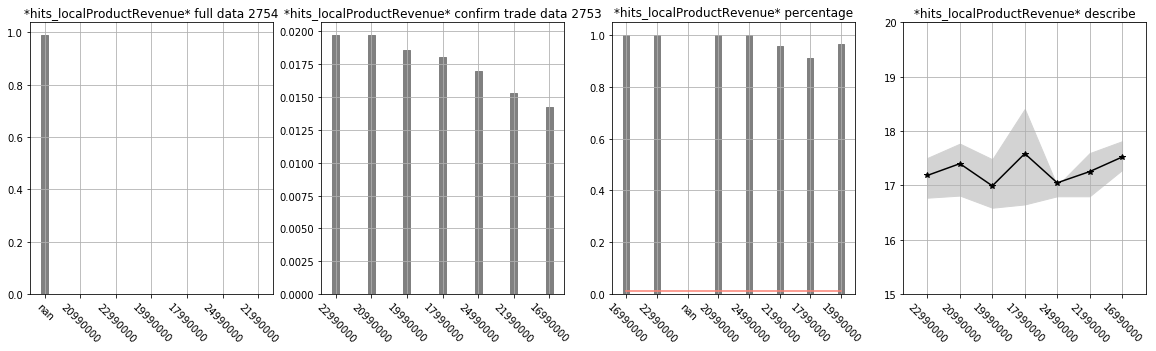

In [39]:
plot_hits(train, hitslist1[2], rotation=-45)

In [40]:
describeinfo(train, hitslist1[2])

hits_localProductRevenue class: 2754 totallen: 170790 len0: 168959 len1: 647 biglen: 1184


### **hits_localTransactionRevenue**以当地货币显示的交易易收入入总额,表示方方式是:传递到 Google Analytics(分析)的值乘以10^6(例例如,2.40 将显示为 2400000)

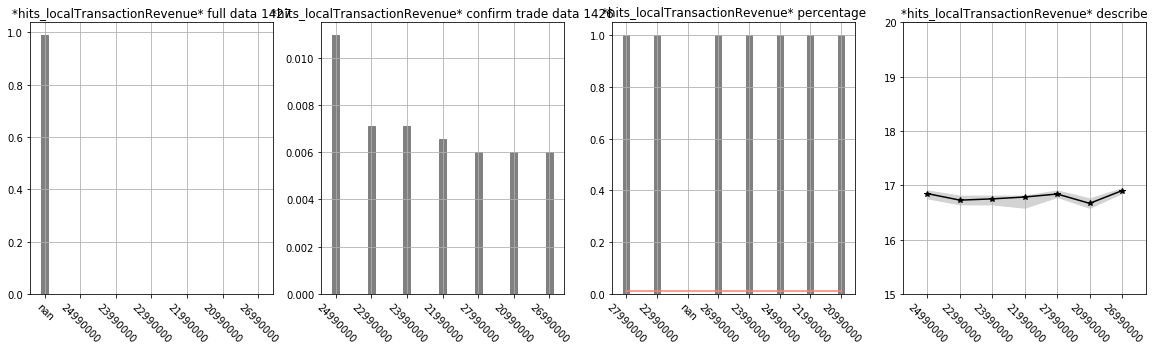

In [41]:
plot_hits(train, hitslist1[3],rotation=-45)

In [42]:
describeinfo(train, hitslist1[3])

hits_localTransactionRevenue class: 1427 totallen: 170790 len0: 168964 len1: 1779 biglen: 47


### **hits_localTransactionShipping**以当地货币表示的交易易运费总额,表示方方式是:传递到 Google Analytics(分析)的值乘以10^6(例例如,2.40 将显示为 2400000)

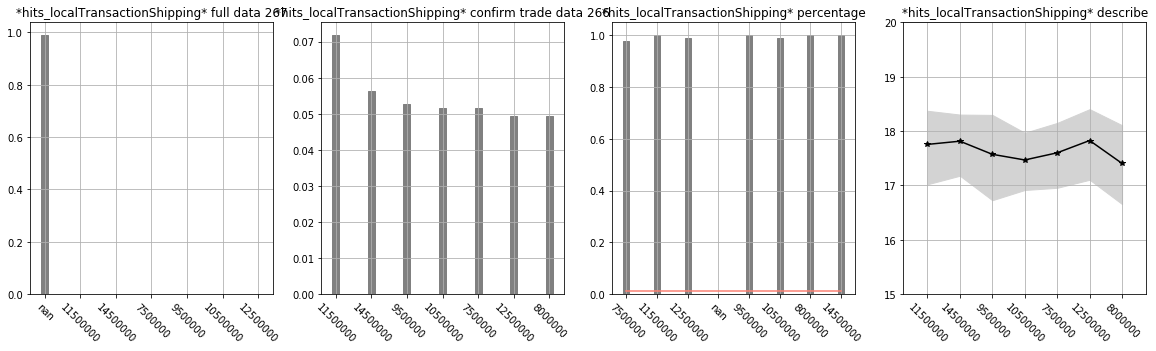

In [43]:
plot_hits(train, hitslist1[4],rotation=-45)

In [44]:
describeinfo(train, hitslist1[4])

hits_localTransactionShipping class: 267 totallen: 170790 len0: 168971 len1: 1772 biglen: 47


### **hits_localTransactionTax**以当地货币显示的交易易税总额,表示方方式是:传递到 Google Analytics(分析)的值乘以10^6(例例如,2.40 将显示为 2400000)

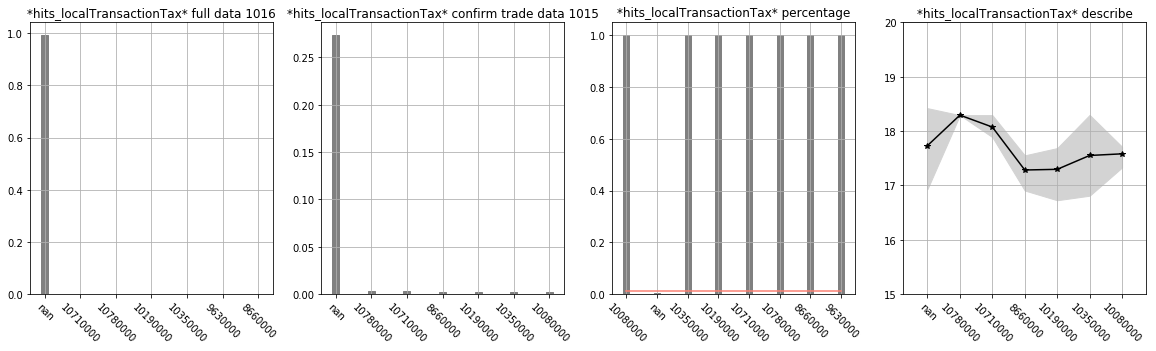

In [45]:
plot_hits(train, hitslist1[5],rotation=-45)

In [46]:
describeinfo(train, hitslist1[5])

hits_localTransactionTax class: 1016 totallen: 170790 len0: 169461 len1: 1300 biglen: 29


### **hits_minute**匹配发生生时间中的分钟部分(介于 0 到 59 之间)

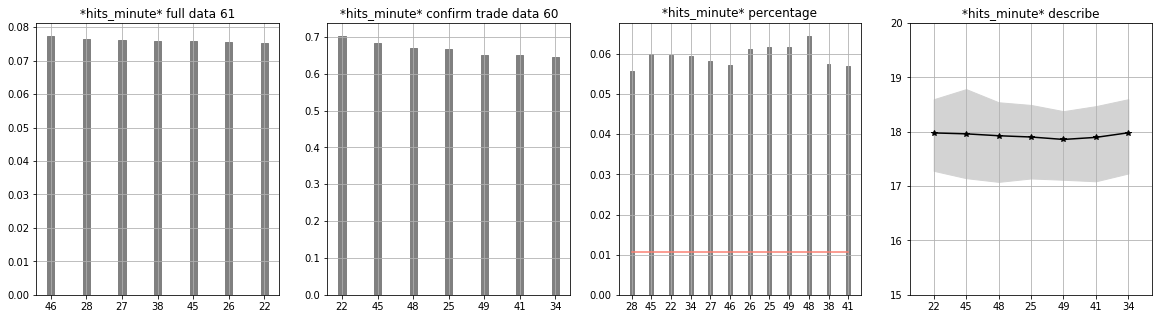

In [47]:
plot_hits(train, hitslist1[6])

In [48]:
describeinfo(train, hitslist1[6])

hits_minute class: 61 totallen: 170790 len0: 133 len1: 86571 biglen: 84086


让我们试试将这个与之前的hour结合起来，统计浏览开始到截至的更加具体时间

In [64]:
train.hits_hour.fillna('nan', inplace=True)

In [73]:
def resolvetime(minute, hour):
    if type(hour) == list:
        starthour = float(hour[0])
        finalhour = float(hour[-1])
        startminute = float(minute[0])
        finalminute = float(minute[-1])
        if starthour > finalhour:
            diffhour = finalhour+24-starthour
        else:
            diffhour = finalhour-starthour
        diffminute = diffhour*60+finalminute-startminute
    else:
        diffminute = 0
    return diffminute


train['diffminute'] = [resolvetime(i[0], i[1]) for i in zip(train.hits_minute, train.hits_hour)]

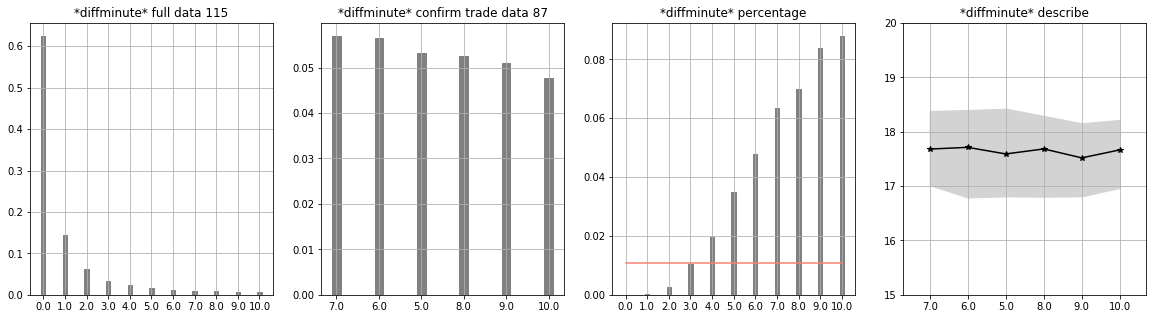

In [79]:
plot_hits(train, 'diffminute', top=10)

drop minute, 保留 diffminute

### **hits_option**当已指定结帐选项时,此字段将自自动填充。例如,可以是 option = 'Fedex' 之类的送货方式选项。

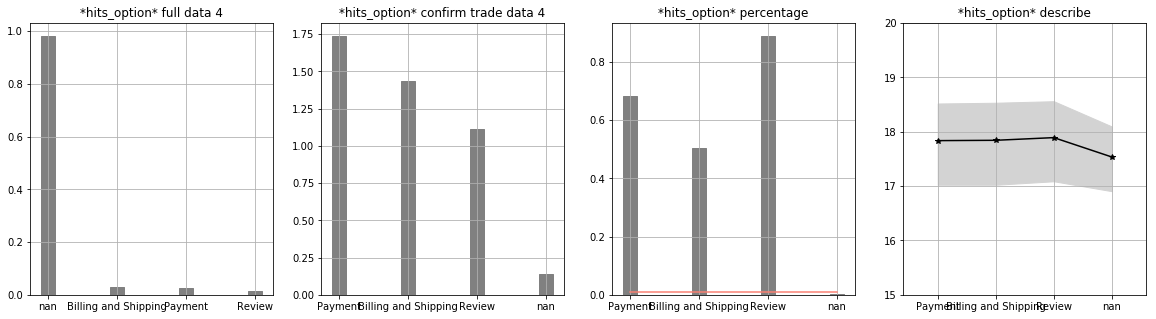

In [49]:
plot_hits(train, hitslist1[7])

In [50]:
describeinfo(train, hitslist1[7])

hits_option class: 4 totallen: 170790 len0: 167704 len1: 730 biglen: 2356


In [62]:
train[train[hitslist1[7]]!='nan'][hitslist1[7]][:20]

63          [Billing and Shipping, Billing and Shipping]
72               [Billing and Shipping, Payment, Review]
76              [Billing and Shipping, Payment, Payment]
78               [Billing and Shipping, Payment, Review]
79          [Billing and Shipping, Billing and Shipping]
84               [Billing and Shipping, Payment, Review]
86                       [Billing and Shipping, Payment]
439                                   [Payment, Payment]
445    [Billing and Shipping, Billing and Shipping, P...
448              [Billing and Shipping, Payment, Review]
452                                    [Payment, Review]
455     [Billing and Shipping, Payment, Payment, Review]
462    [Billing and Shipping, Payment, Billing and Sh...
464                                            [Payment]
467    [Billing and Shipping, Billing and Shipping, P...
620                      [Billing and Shipping, Payment]
630             [Billing and Shipping, Payment, Payment]
631              [Billing and S

建议：onehot

### **hits_pageDownloadTime**在所有样本中下载此网网⻚页所需的总时间(以毫秒为单位)

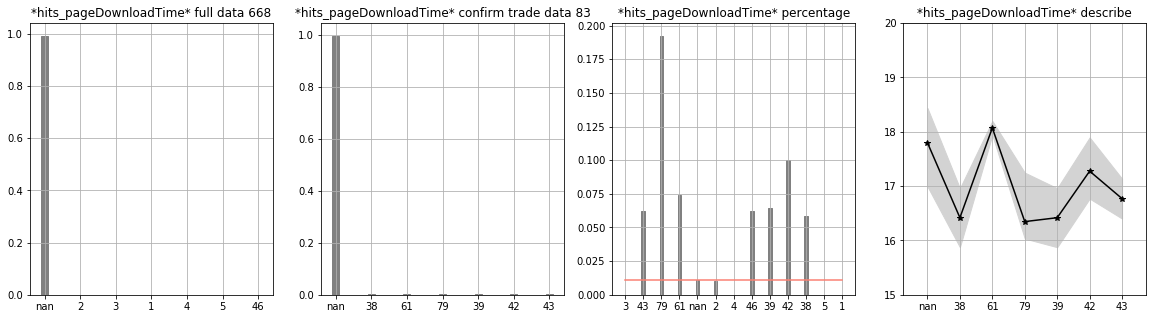

In [51]:
plot_hits(train, hitslist1[8])

In [52]:
describeinfo(train, hitslist1[8])

hits_pageDownloadTime class: 668 totallen: 170790 len0: 169251 len1: 783 biglen: 756


In [60]:
train[train[hitslist1[8]]!='nan'][hitslist1[8]][:5]

32                                       [193, 151, 356]
82     [6, 44, 52, 53, 53, 53, 58, 58, 47, 47, 47, 47...
92                                            [231, 232]
143                                                 [23]
274                                                  [5]
Name: hits_pageDownloadTime, dtype: object

我们貌似可以创建一个新的特征， 就是每个样本该值的平均数， 然后删除掉 hits_pageDownloadTime

### **hits_pageLoadSample**用于计算平均网网⻚页加载时间的网网⻚页浏览样本集(或计数)

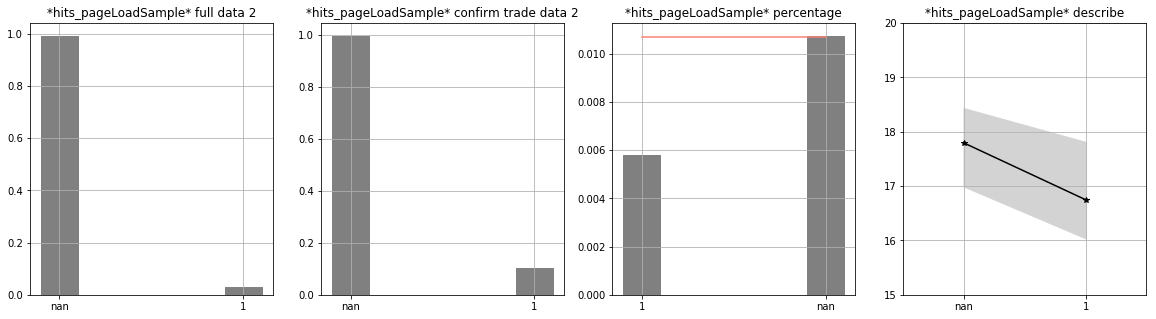

In [53]:
plot_hits(train, hitslist1[9])

In [54]:
describeinfo(train, hitslist1[9])

hits_pageLoadSample class: 2 totallen: 170790 len0: 169240 len1: 791 biglen: 759


删了吧 drop